<a href="https://colab.research.google.com/github/Madhulik123/Data-Analysis-project/blob/Heart-Attack-Data-Analysis/Copy_of_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. **Objective** Hospital want to understand the patient characteristics associated with heartattack risk to improve preventative measures.

### 2. **Data Overview** Dataset has patient related data and factors like age,gender,heart rate,bp which contribute to heart attack risk in the patients. it also has CKMB and Tropnin which are blood markers which can detect the heart damage. its level will increase if the heart is damage.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# 3. **Data Reading**

In [4]:
#read the data as a dataframe
df=pd.read_csv("Medicaldataset.csv")

In [5]:
#shape of the dataset
df.shape
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
# Datatype of each column in dataframe
df.dtypes

,0
Age,int64
Gender,int64
Heart rate,int64
Systolic blood pressure,int64
Diastolic blood pressure,int64
Blood sugar,float64
CK-MB,float64
Troponin,float64
Result,object


In [7]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [8]:
#Statistics of the dataset
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


# 4. **Data Cleaning**


In [9]:

# Missing value detection
df.isna().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


There is no need to deal with data missing as there is no missing data.

In [10]:
#Find % of null values in datasets
print(df.isna().sum()/len(df)*100, '\n')

Age                         0.0
Gender                      0.0
Heart rate                  0.0
Systolic blood pressure     0.0
Diastolic blood pressure    0.0
Blood sugar                 0.0
CK-MB                       0.0
Troponin                    0.0
Result                      0.0
dtype: float64 



There is no Null values has been detected

In [11]:
#find all the symbol or character in the dataset which should not be part of the column, find for all columns

import string

# Function to find non-standard characters in a column
def find_non_standard_chars(df, column):
    # Define allowed characters (letters, numbers, whitespace, common punctuation)
    allowed_chars = string.ascii_letters + string.digits + string.whitespace + string.punctuation

    # Initialize a set to store unique non-standard characters
    non_standard_chars = set()

    # Iterate through each value in the column
    for value in df[column].dropna(): # Use dropna to skip NaN values
        # Convert value to string (handle potential non-string data types)
        value_str = str(value)
        # Check each character in the string
        for char in value_str:
            if char not in allowed_chars:
                non_standard_chars.add(char)
    return non_standard_chars

# Iterate through all columns in the DataFrame
for col in df.columns:
    non_standard_chars_in_col = find_non_standard_chars(df, col)
    if non_standard_chars_in_col:
        print(f"Non-standard characters found in column '{col}': {non_standard_chars_in_col}")
    else:
        print(f"No non-standard characters found in column '{col}' (or column is empty/contains only standard chars).")

No non-standard characters found in column 'Age' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Gender' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Heart rate' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Systolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Diastolic blood pressure' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Blood sugar' (or column is empty/contains only standard chars).
No non-standard characters found in column 'CK-MB' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Troponin' (or column is empty/contains only standard chars).
No non-standard characters found in column 'Result' (or column is empty/contains only standard chars).


4.1 **Outlier Detection and Handeling**

Generating Histograms split by 'Result'...


<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


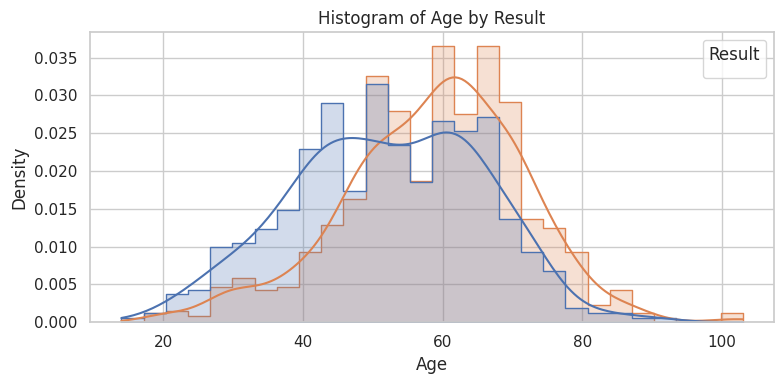

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


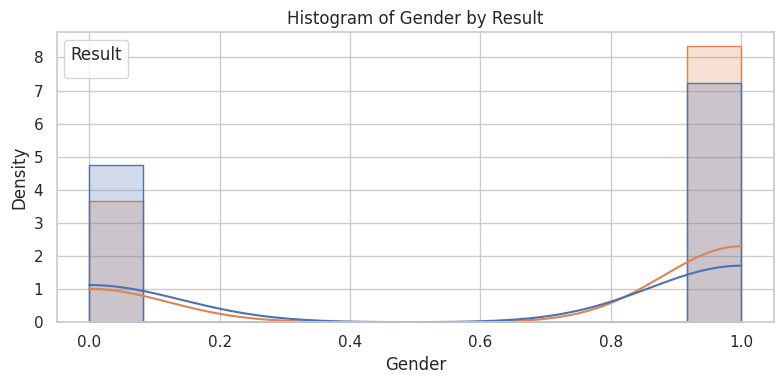

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


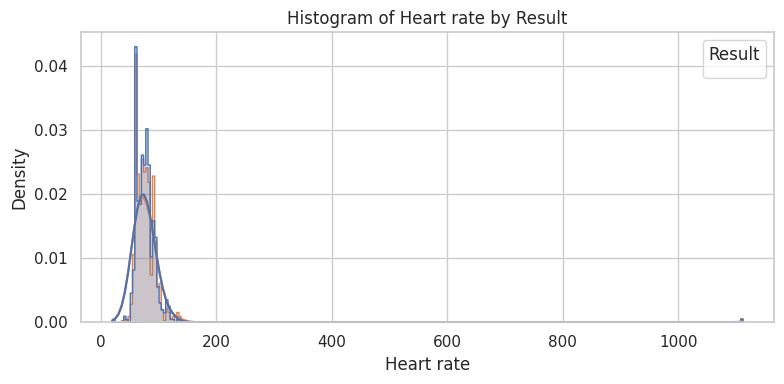

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


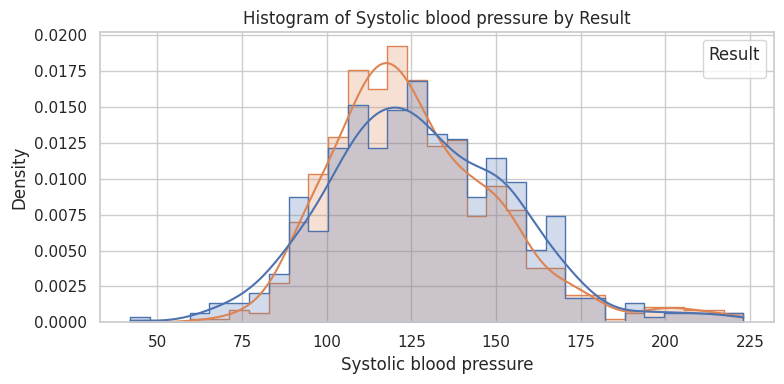

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


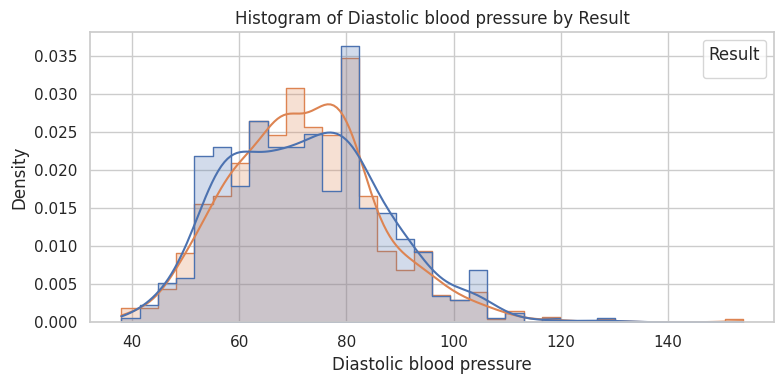

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


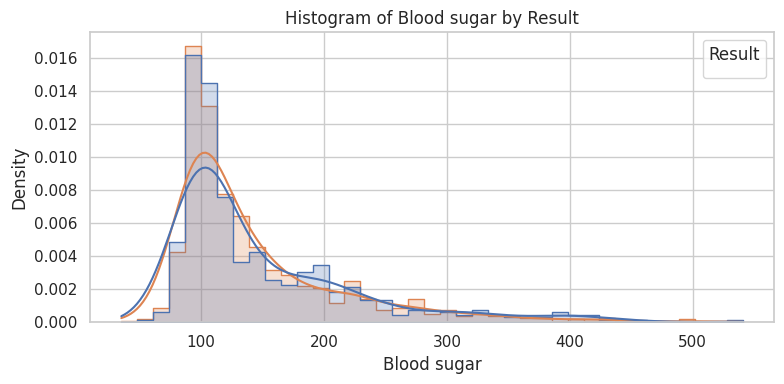

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


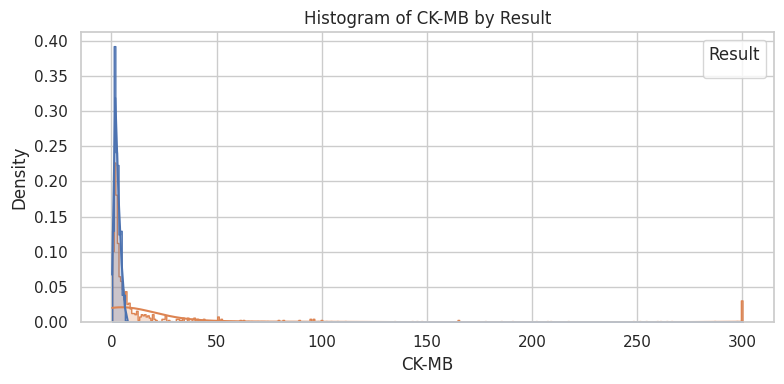

<ipython-input-12-4254375018>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Result')


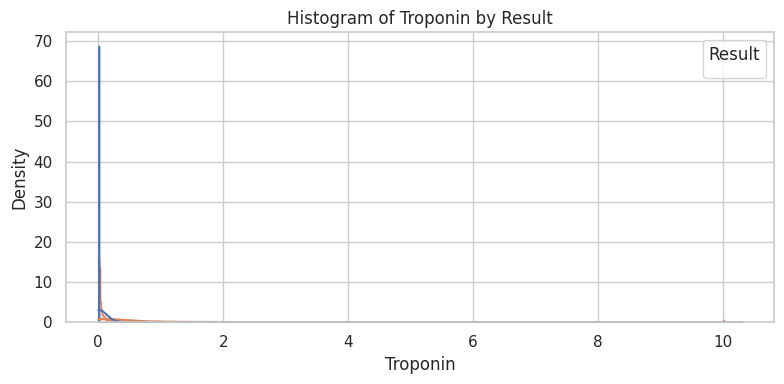

Generating Box Plots split by 'Result'...


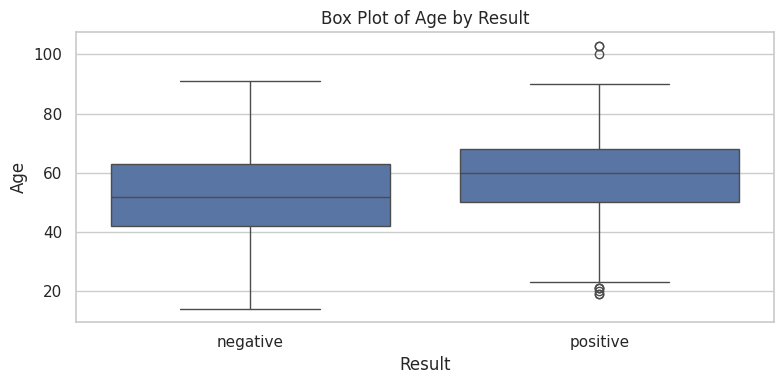

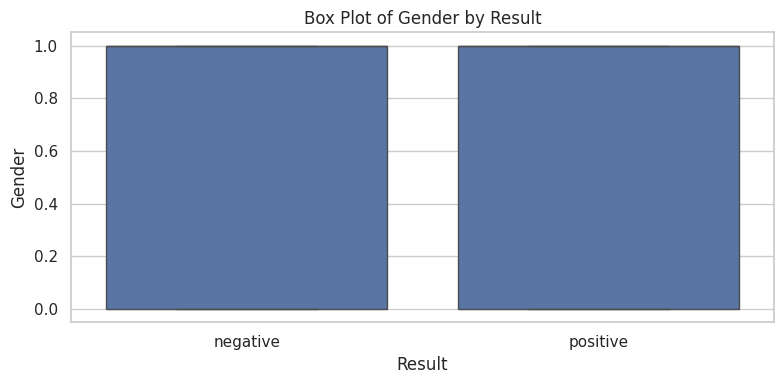

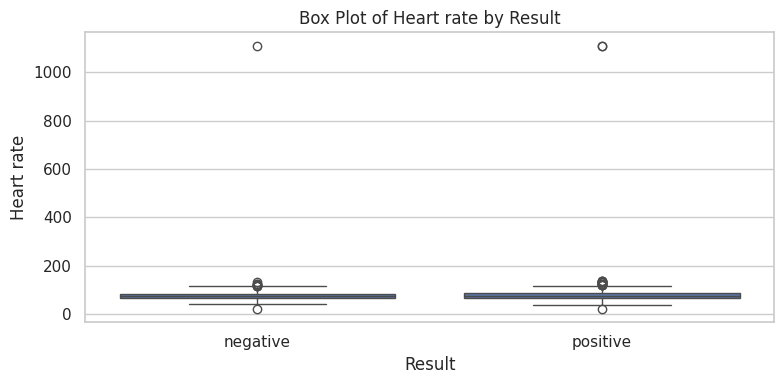

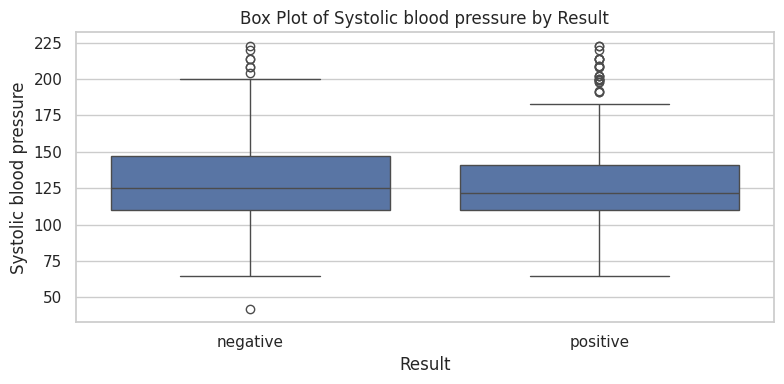

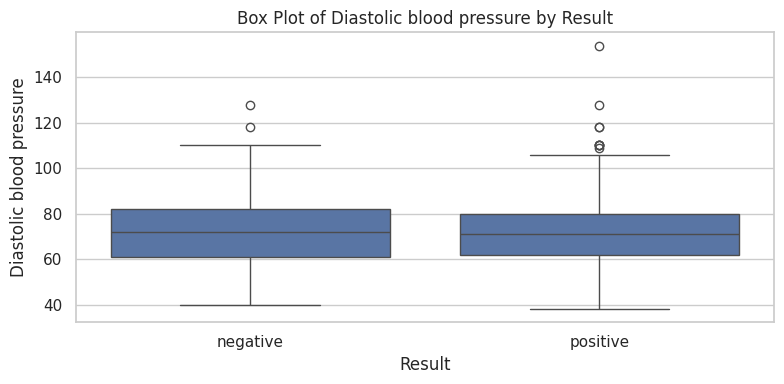

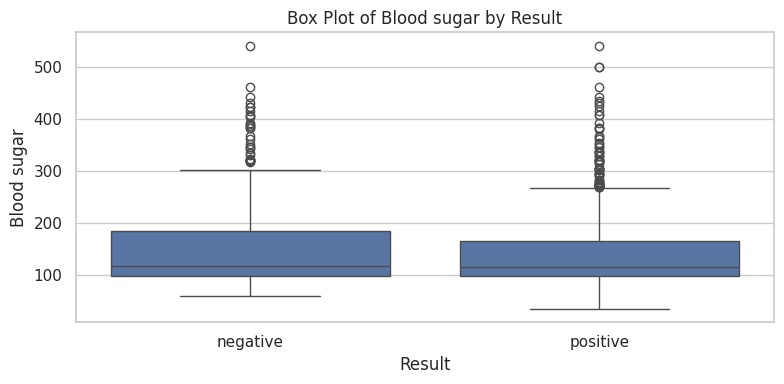

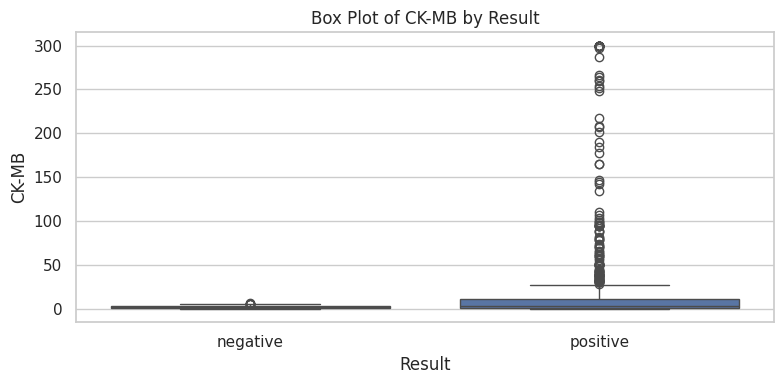

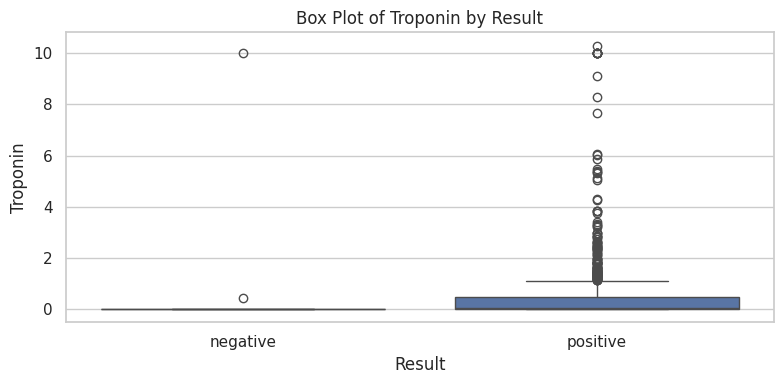

In [12]:
#Visual Representation of the outliers in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

standard_colors = ["#1f77b4", "#ff7f0e"]
# Apply globally using rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=standard_colors)

# Set up for better visuals
sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include='number').columns.drop('Result', errors='ignore')

# Histograms
print("Generating Histograms split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Result', kde=True, element='step', stat="density", common_norm=False)
    plt.title(f"Histogram of {col} by Result")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title='Result')
    plt.tight_layout()
    plt.show()

# Box Plots
print("Generating Box Plots split by 'Result'...")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Result', y=col)
    plt.title(f"Box Plot of {col} by Result")
    plt.xlabel("Result")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


**Observation**

1. Column AGE has outliers 103 detected.  

2. Heart rate has outliers e.g 1111.

3. Systolic Blood Pressure has outliers e.g. 223.

4. Blood Suger has outliers 541.

5. CK-MB has outliers 300.



4.2 **find Outliers Count**

In [28]:
# --- 2. Count Specific Outlier/Extreme Values ---
print("\n--- Counting Specific Outlier/Extreme Value Occurrences ---")

# 2.1. Age: 103
age_outlier_value = 103
age_outlier_count = df[df['Age'] == age_outlier_value].shape[0]
print(f"Column 'Age': Value '{age_outlier_value}' appears {age_outlier_count} time(s).")

# 2.2. Heart rate: 1111
heart_rate_outlier_value = 1111
heart_rate_outlier_count = df[df['Heart rate'] == heart_rate_outlier_value].shape[0]
print(f"Column 'Heart rate': Value '{heart_rate_outlier_value}' appears {heart_rate_outlier_count} time(s).")

# 2.3. Systolic Blood Pressure: 223
systolic_bp_outlier_value = 223
systolic_bp_outlier_count = df[df['Systolic blood pressure'] == systolic_bp_outlier_value].shape[0]
print(f"Column 'Systolic blood pressure': Value '{systolic_bp_outlier_value}' appears {systolic_bp_outlier_count} time(s).")

# 2.4. Blood Sugar: 541
blood_sugar_outlier_value = 541
blood_sugar_outlier_count = df[df['Blood sugar'] == blood_sugar_outlier_value].shape[0]
print(f"Column 'Blood sugar': Value '{blood_sugar_outlier_value}' appears {blood_sugar_outlier_count} time(s).")
# 2.5. CK-MB: 300
ck_mb_outlier_value = 300
ck_mb_outlier_count = df[df['CK-MB'] == ck_mb_outlier_value].shape[0]
print(f"Column 'CK-MB': Value '{ck_mb_outlier_value}' appears {ck_mb_outlier_count} time(s).")


--- Counting Specific Outlier/Extreme Value Occurrences ---
Column 'Age': Value '103' appears 2 time(s).
Column 'Heart rate': Value '1111' appears 0 time(s).
Column 'Systolic blood pressure': Value '223' appears 3 time(s).
Column 'Blood sugar': Value '541' appears 2 time(s).
Column 'CK-MB': Value '300' appears 0 time(s).


**Observation**

1. 103 is the maximum age observed in the dataset. While high, it's generally considered physiologically possible, acting as an extreme edge of the distribution rather than a clear error
2. 1111 is an extreme, physiologically impossible value, indicating a clear data entry error
3. 223 is the maximum observed systolic blood pressure. While high, it's generally considered physiologically possible but very extreme.
4. 541 is the maximum observed blood sugar. While very high, it's medically possible (e.g., severe hyperglycemia), making it an extreme value rather than a clear error.
5. 300 is the maximum observed CK-MB. Its exact, repeated occurrence strongly suggests it's a 'capped value' or measurement limit, rather than a precise biological reading.


4.3 **Handle Outliers**

In [24]:
print("\n--- Handling Data Quality Issues ---")
# --- 2. Data Cleaning Steps (Consolidated and Corrected) ---
print("\n--- Performing Data Cleaning and Initial Encoding ---")

# 2.1. Handle Extreme Outliers (Physiologically Impossible)
# Identified from df.describe() as 1111 for Heart rate.
# Max Age (103) and max BP/Blood Sugar (223, 541) are extreme but plausible, so kept as is.
initial_rows_count = df.shape[0]
heart_rate_invalid_value = 1111
df = df[df['Heart rate'] != heart_rate_invalid_value]
rows_removed_hr = initial_rows_count - df.shape[0]
print(f"Removed {rows_removed_hr} rows with 'Heart rate' = {heart_rate_invalid_value} (physiologically impossible).")

# 2.2. Handle 'Gender' Encoding (for clarity and later interaction term)
# Maps 0/1 to descriptive strings, then encodes them numerically.
# This makes 'Gender_Encoded' the clear column to use for modeling.
df['Gender_Mapped'] = df['Gender'].map({0: 'Female', 1: 'Male'})
df['Gender_Encoded'] = df['Gender_Mapped'].map({'Female': 0, 'Male': 1}) # 0 for Female, 1 for Male
print("Mapped 'Gender' to 'Female'/'Male' and created 'Gender_Encoded' (0/1).")

# 2.3. Handle Capped Values (CRITICAL FIX)
# Identified: CK-MB=300, Troponin=10. These are likely measurement caps.
# We first create a flag, then impute the original column with the median of non-capped values.

# CK-MB capping
df['CK_MB_Capped_Flag'] = (df['CK-MB'] == 300).astype(int)
# Calculate median ONLY from values that are NOT the cap (300)
ck_mb_median = df.loc[df['CK-MB'] != 300, 'CK-MB'].median()
df['CK-MB'] = df['CK-MB'].replace(300, ck_mb_median) # <-- THIS IS THE CRITICAL IMPUTATION
print(f"Handled CK-MB capped values: Created 'CK_MB_Capped_Flag' and imputed original 300s with median ({ck_mb_median:.2f}).")

# Troponin capping
df['Troponin_Capped_Flag'] = (df['Troponin'] == 10).astype(int)
# Calculate median ONLY from values that are NOT the cap (10)
troponin_median = df.loc[df['Troponin'] != 10, 'Troponin'].median()
df['Troponin'] = df['Troponin'].replace(10, troponin_median) # <-- THIS IS THE CRITICAL IMPUTATION
print(f"Handled Troponin capped values: Created 'Troponin_Capped_Flag' and imputed original 10s with median ({troponin_median:.4f}).")


# 2.4. Encode 'Result' for numerical modeling
df['Result_Encoded'] = df['Result'].map({'negative': 0, 'positive': 1})
print("Encoded 'Result' to 'Result_Encoded' (negative=0, positive=1).")



--- Handling Data Quality Issues ---

--- Performing Data Cleaning and Initial Encoding ---
Removed 3 rows with 'Heart rate' = 1111 (physiologically impossible).
Mapped 'Gender' to 'Female'/'Male' and created 'Gender_Encoded' (0/1).
Handled CK-MB capped values: Created 'CK_MB_Capped_Flag' and imputed original 300s with median (2.84).
Handled Troponin capped values: Created 'Troponin_Capped_Flag' and imputed original 10s with median (0.0140).
Encoded 'Result' to 'Result_Encoded' (negative=0, positive=1).


<ipython-input-24-4052932061>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_Mapped'] = df['Gender'].map({0: 'Female', 1: 'Male'})
<ipython-input-24-4052932061>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_Encoded'] = df['Gender_Mapped'].map({'Female': 0, 'Male': 1}) # 0 for Female, 1 for Male
<ipython-input-24-4052932061>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

# 5. **Exploratory Data Analysis**

**5.1 Descriptive Analysis**

In [25]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Gender_Mapped,Gender_Encoded,CK_MB_Capped_Flag,Troponin_Capped_Flag,Result_Encoded
0,64,1,66,160,83,160.0,1.80,0.012,negative,Male,1,0,0,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,Male,1,0,0,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,Male,1,0,0,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,Male,1,0,0,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,Male,1,0,0,0


In [26]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.groupby('Result').describe()


Age                                                      Gender  \
          count       mean        std   min   25%   50%   75%    max  count   
Result                                                                        
negative  508.0  52.133858  13.715257  14.0  42.0  52.0  63.0   91.0  508.0   
positive  808.0  58.769802  12.956374  19.0  50.0  60.0  68.0  103.0  808.0   

                                                      Heart rate             \
              mean       std  min  25%  50%  75%  max      count       mean   
Result                                                                        
negative  0.604331  0.489476  0.0  0.0  1.0  1.0  1.0      508.0  75.852362   
positive  0.695545  0.460461  0.0  0.0  1.0  1.0  1.0      808.0  76.064356   

                                                   Systolic blood pressure  \
                std   min   25%   50%   75%    max                   count   
Result                                                                       
negative  14.818024  20.0  64.0  75.0  84.0  132.0                   508.0   
positive  15.566966  20.0  64.0  74.0  85.0  135.0                   808.0   

                                                                    \
                mean        std   min     25%    50%    75%    max   
Result                                                               
negative  127.830709  27.057374  42.0  109.75  125.0  147.0  223.0   
positive  126.704208  25.560684  65.0  110.00  122.0  140.0  223.0   

         Diastolic blood pressure                                          \
                            count       mean        std   min   25%   50%   
Result                                                                      
negative                    508.0  72.395669  14.304485  40.0  61.0  72.0   
positive                    808.0  72.105198  13.825791  38.0  62.0  71.0   

                      Blood sugar                                            \
           75%    max       count        mean        std   min   25%    50%   
Result                                                                        
negative  82.0  128.0       508.0  149.891142  78.426826  60.0  98.0  117.0   
positive  80.0  154.0       808.0  144.724010  72.707418  35.0  98.0  116.0   

                        CK-MB                                            \
            75%    max  count       mean        std    min   25%    50%   
Result                                                                    
negative  184.0  541.0  508.0   2.555138   1.368889  0.321  1.50  2.295   
positive  166.0  541.0  808.0  16.330321  38.670665  0.353  1.87  3.445   

                          Troponin                                           \
              75%     max    count      mean       std    min    25%    50%   
Result                                                                        
negative   3.3525    7.02    508.0  0.007368  0.018931  0.001  0.003  0.006   
positive  10.3300  297.50    808.0  0.484413  1.078077  0.003  0.016  0.043   

                          Gender_Encoded                                     \
              75%     max          count      mean       std  min  25%  50%   
Result                                                                        
negative  0.00900   0.426          508.0  0.604331  0.489476  0.0  0.0  1.0   
positive  0.41525  10.300          808.0  0.695545  0.460461  0.0  0.0  1.0   

                   CK_MB_Capped_Flag                                          \
          75%  max             count      mean       std  min  25%  50%  75%   
Result                                                                         
negative  1.0  1.0             508.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
positive  1.0  1.0             808.0  0.023515  0.151626  0.0  0.0  0.0  0.0   

              Troponin_Capped_Flag                                          \
          max                count      mean     

**Observation**
1. Any patient with  **CKMB>16.33 and Tropnin > 0.48 ** should be alterted.
2. From **age 45 to 85 **there is spike in the positive cases.
3. most of the positive cases fall for **male patient**
4. Bp for positive cases are ranging from **65 to 110**.
5. Higher the **troponin and CKMB ** , there is more chances of the positive cases.



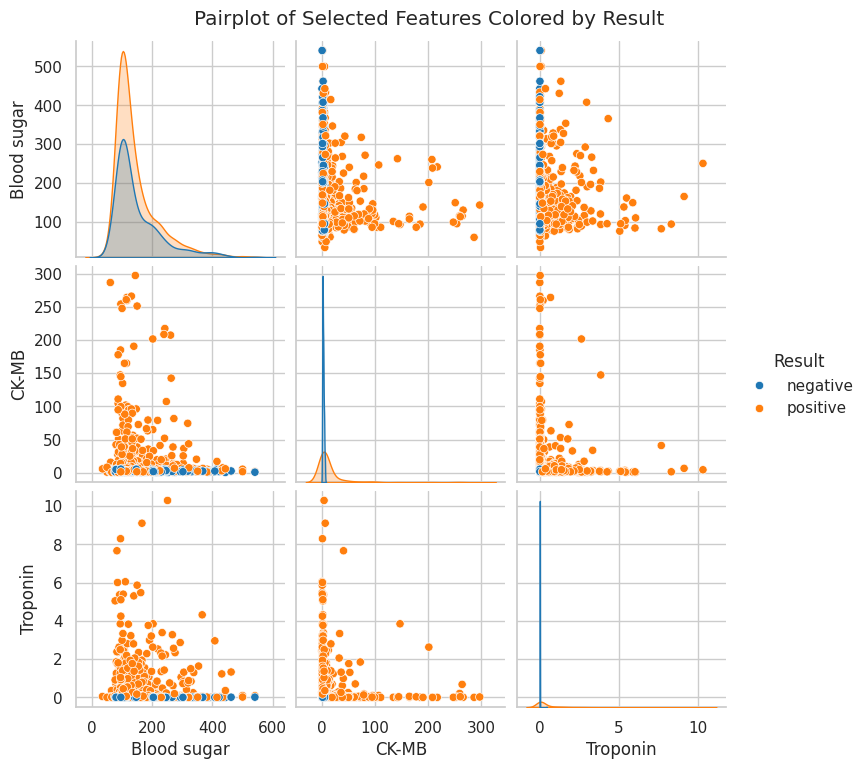

In [27]:
#Corelation between multiple features using pairplot
# Select variables of interest
features = ['Blood sugar', 'CK-MB', 'Troponin', 'Result']

# Generate pairplot
sns.pairplot(data=df[features], hue='Result', palette=['#1f77b4', '#ff7f0e'],diag_kind='kde')
plt.suptitle('Pairplot of Selected Features Colored by Result', y=1.02)
plt.show()


**Observation**
These two features show a strong potential as biomarkers for predicting positive outcomes.

1. CK-MB and Troponin are clustered low for negatives, but spread wide for positives.
2. CK-MB and Troponin are excellent discriminators between positive and negative results
3. Blood Sugar shows weak separation
Blood sugar levels have large overlap between positive and negative cases.Slight tendency of higher values among positives, but not distinct.
4. Blood sugar alone may not be a strong predictor of result.
5. Age has overlapping distribution
There's a slight shift in distribution: positive cases are slightly more frequent in older ages.But still, there's considerable overlap, and young individuals also show positive results.
6. Age contributes some signal but is not a strong standalone predictor.
7. Plot shows some positive relationship: when CK-MB is high, Troponin tends to be high as well (especially for positive cases).

**5.2** **Corelation between variables**


--- Correlation Matrix Heatmap (All Numerical Features) ---


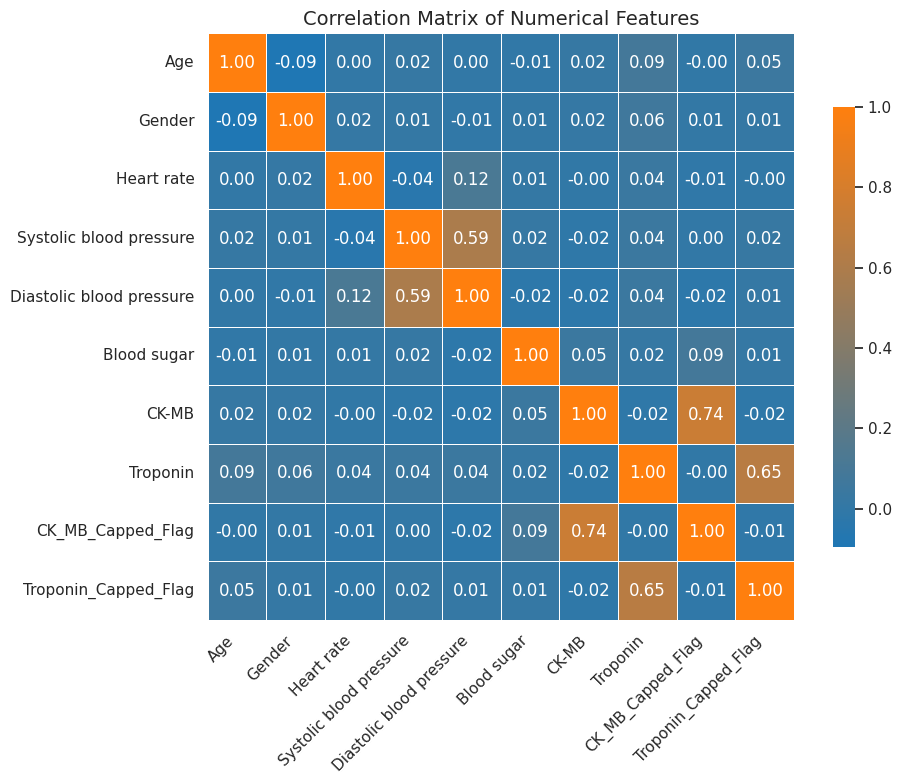

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

print("\n--- Correlation Matrix Heatmap (All Numerical Features) ---")

# Select only numeric columns (including flags and Result_Encoded)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create a two‐color “gradient” colormap from #1f77b4 to #ff7f0e
custom_cmap = LinearSegmentedColormap.from_list(
    name="two_color",
    colors=["#1f77b4", "#ff7f0e"]
)

# Plot heatmap using the custom two‐color cmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,     # ← here is where the two‐color gradient is applied
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Questions to Answer**

In [ ]:
#Questions to Answers
#1. what percentage of people has heart attack risk?
#2.how this risk is distributed in male and female?
#3.what is the age group which most patient are falling for heart attack?
#4.what is the avg heart rate,bp,blood suger for positive patient
#5. what is avg CKMB and troponin for positive patient?

In [ ]:
#1. what percentage of people has heart attack risk?
result_count=df["Result"].value_counts()
overall=result_count.sum()

positive_percentage = (result_count["positive"] / overall) * 100
negative_percentage = (result_count["negative"] / overall) * 100

print(f"Percentage of positive results: {positive_percentage:.2f}%")
print(f"Percentage of negative results: {negative_percentage:.2f}%")

Percentage of positive results: 61.40%
Percentage of negative results: 38.60%


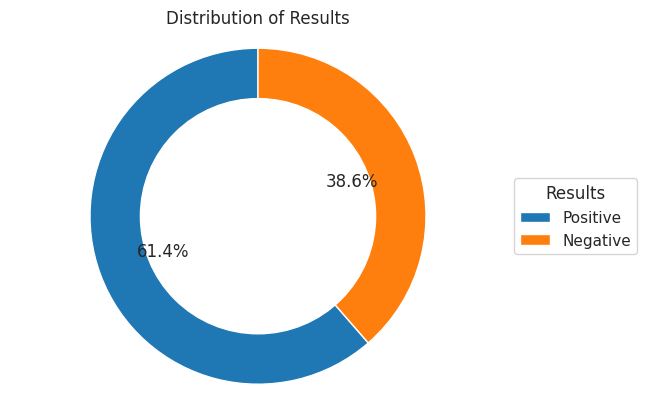

In [ ]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors=["#1f77b4", "#ff7f0e"]

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, autopct='%1.1f%%',
                                   startangle=90)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Results')
plt.legend(wedges, labels,
           title="Results",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Percentage of gender in positive cases:
Gender
1    69.554455
0    30.445545
Name: count, dtype: float64


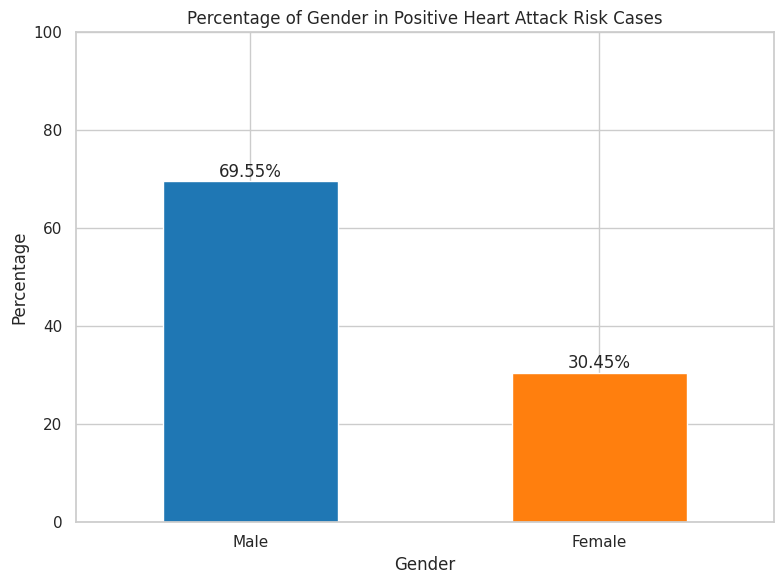

In [ ]:
#2.how this risk is distributed in male and female?
# prompt: find percentage of gender in positive_number with visualization
#Assumed here 1 = Male and 0 = Female in the dataset for gender column

# Filter the DataFrame to include only rows where 'Result' is 'positive'
positive_df = df[df['Result'] == 'positive']

# Get the value counts for the 'sex' column within the positive cases
gender_distribution_positive = positive_df['Gender'].value_counts()

# Calculate the percentage distribution
gender_percentage_positive = (gender_distribution_positive / gender_distribution_positive.sum()) * 100

print("Percentage of gender in positive cases:")
print(gender_percentage_positive)

# --- Start: Code added/modified to map labels for plotting ---
# Map the numerical index of the Series to 'Female' and 'Male' for plot labels.
# Based on the assumption 0=Female, 1=Male as per your data dictionary.
# This step modifies the index of the 'gender_percentage_positive' Series ONLY.
gender_percentage_positive.index = gender_percentage_positive.index.map({0: 'Female', 1: 'Male'})
# --- End: Code added/modified for plotting labels ---
# Create the visualization
plt.figure(figsize=(8, 6))
gender_percentage_positive.plot(kind='bar', color=["#1f77b4", "#ff7f0e"])
plt.title('Percentage of Gender in Positive Heart Attack Risk Cases')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.ylim(0, 100) # Set y-axis limit to 0-100%

# Add the percentage values on top of the bars
for i, percentage in enumerate(gender_percentage_positive):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()



In [ ]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,CK_MB_Capped_Flag,Troponin_Capped_Flag
0,64,1,66,160,83,160.0,1.80,0.012,negative,0,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,0
2,55,1,64,160,77,270.0,1.99,0.003,negative,0,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,0
4,55,1,64,112,65,300.0,1.08,0.003,negative,0,0


Overall 69.1% Patients are positive cases and 31% patient falls under negetive cases for heart attack.

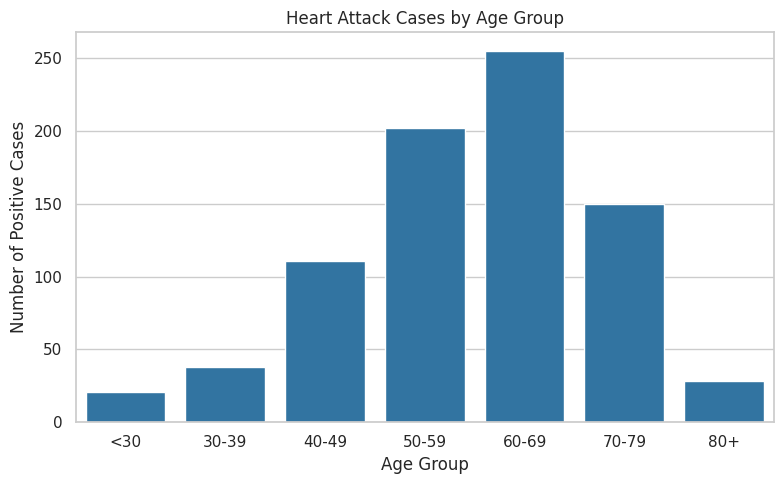

In [ ]:
#Age group in which most number of positive cases are falling?
# Define age bins
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filter only positive cases
positive_cases = df[df['Result'] == 'positive']
standard_colors = ["#1f77b4", "#ff7f0e"]
# Apply globally using rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=standard_colors)


# Count number of cases per age group
age_group_counts = positive_cases['AgeGroup'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Heart Attack Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Positive Cases')
plt.tight_layout()
plt.show()



Age group 60-69 falls under most cases of heart attack. The precausery measure needed to take to alert the patient of this group to prevent the heart attack.

**Feature Engineering**

In [ ]:
#added pulse_pressure = The difference between systolic and diastolic blood pressure. A high pulse pressure can be an indicator of cardiovascular risk.
df['pulse_pressure'] = df['Systolic blood pressure']-df[ 'Diastolic blood pressure']
# Filter only positive cases
positive_cases = df[df['Result'] == 'positive']
# Filter only negetive cases
negetive_cases = df[df['Result'] == 'negative']
standard_colors = ["#1f77b4", "#ff7f0e"]
# Apply globally using rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=standard_colors)

#MAP = Represents the average arterial pressure during a single cardiac cycle.
#It's often considered a better indicator of organ perfusion than systolic BP alone.
df['MAP'] = df['Diastolic blood pressure'] + (1/3) * df['pulse_pressure']
positive_cases['MAP'] = positive_cases['Diastolic blood pressure'] + (1/3) * positive_cases['pulse_pressure']
negetive_cases['MAP'] = negetive_cases['Diastolic blood pressure'] + (1/3) * negetive_cases['pulse_pressure']

#Biomarker = Product of CK-MB and Troponin.
# This captures a synergistic effect if both are high.
df['Biomarker'] = df['CK-MB'] * df['Troponin']

#If there is after certain time age has increased and if the values varies with different gender.
df['Age_Squared'] = df['Age']**2
# Assuming 'Gender_Encoded' is 0 for Female and 1 for Male
df['Age_Gender_Interaction'] = df['Age'] * df['Gender']

df.head()

<ipython-input-159-2402318785>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_cases['MAP'] = positive_cases['Diastolic blood pressure'] + (1/3) * positive_cases['pulse_pressure']
<ipython-input-159-2402318785>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negetive_cases['MAP'] = negetive_cases['Diastolic blood pressure'] + (1/3) * negetive_cases['pulse_pressure']


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,CK_MB_Capped_Flag,Troponin_Capped_Flag,AgeGroup,pulse_pressure,MAP,Biomarker,Age_Squared,Age_Gender_Interaction
0,64,1,66,160,83,160.0,1.80,0.012,negative,0,0,60-69,77,108.666667,0.02160,4096,64
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,0,<30,52,63.333333,7.15500,441,21
2,55,1,64,160,77,270.0,1.99,0.003,negative,0,0,50-59,83,104.666667,0.00597,3025,55
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,0,60-69,65,76.666667,1.69214,4096,64
4,55,1,64,112,65,300.0,1.08,0.003,negative,0,0,50-59,47,80.666667,0.00324,3025,55


In [ ]:
positive_cases.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,CK_MB_Capped_Flag,Troponin_Capped_Flag,AgeGroup,pulse_pressure,MAP,Biomarker,Age_Squared,Age_Gender_Interaction
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,0,<30,52,63.333333,7.15500,441,21
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,0,60-69,65,76.666667,1.69214,4096,64
7,63,1,60,214,82,87.0,300.00,2.370,positive,1,0,60-69,132,126.000000,711.00000,3969,63
12,64,1,60,199,99,92.0,3.43,5.370,positive,0,0,60-69,100,132.333333,18.41910,4096,64
15,61,1,81,118,66,134.0,1.49,0.017,positive,0,0,60-69,52,83.333333,0.02533,3721,61


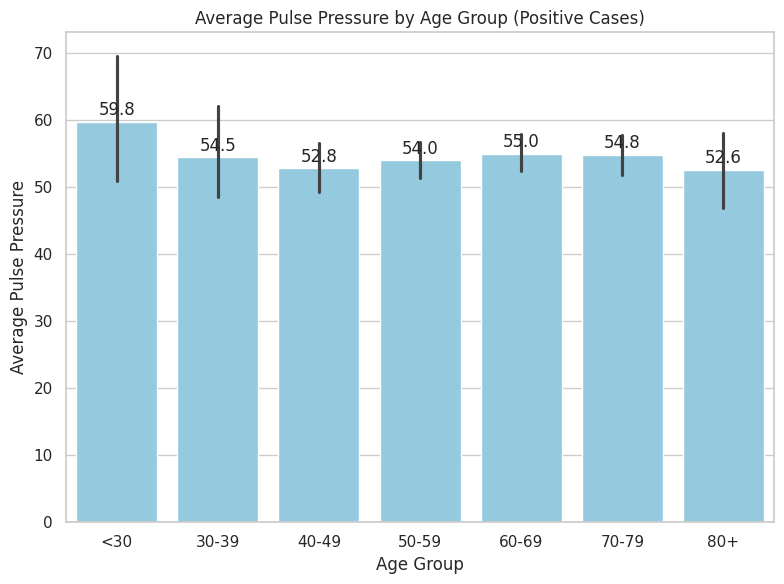

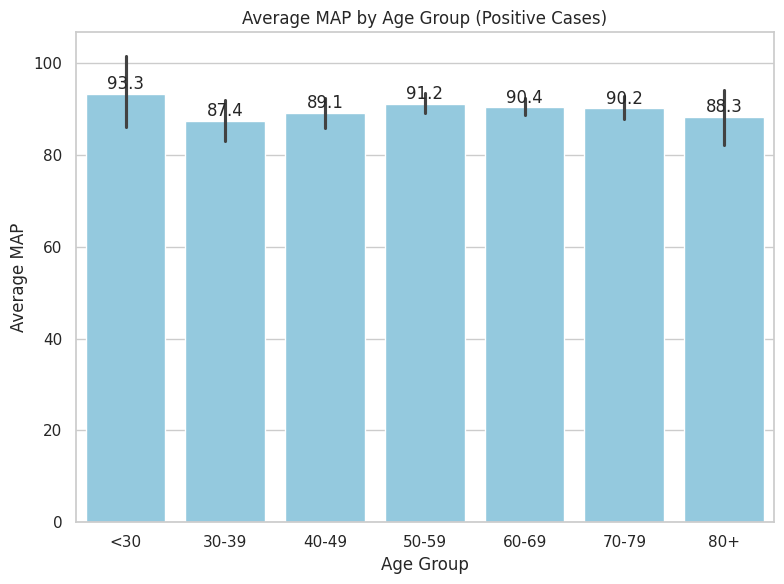

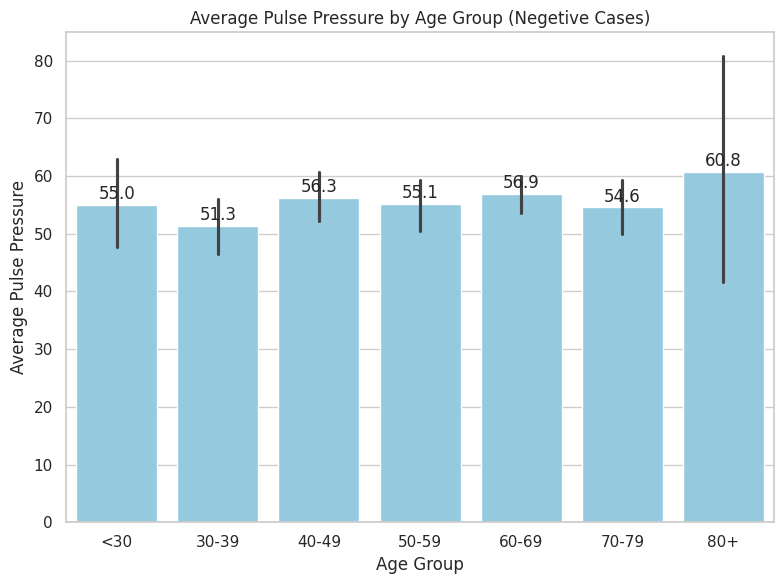

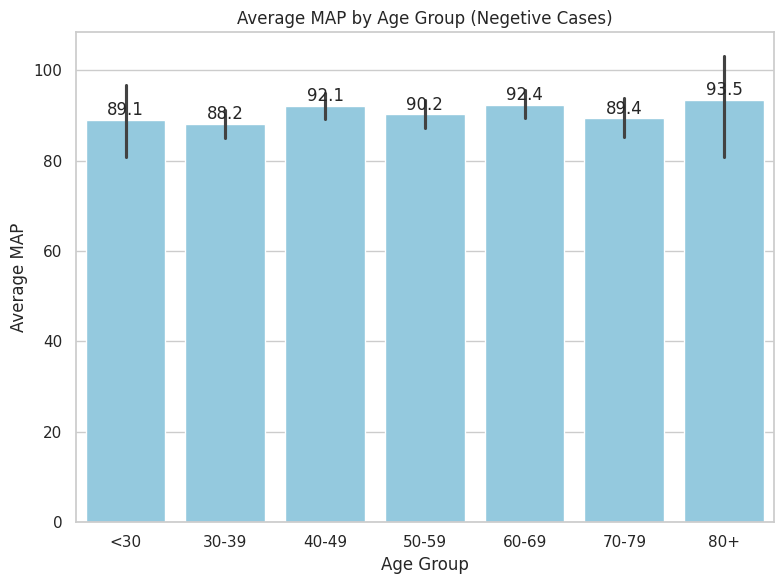

In [ ]:
#Analysis on pulse_pressure
import seaborn as sns
import matplotlib.pyplot as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=positive_cases, x='AgeGroup', y='pulse_pressure', color='skyblue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,  # small offset above the bar
        s=f"{height:.1f}",  # format to 1 decimal place
        ha='center'
    )

# Titles and labels
plt.title('Average Pulse Pressure by Age Group (Positive Cases)')
plt.xlabel('Age Group')
plt.ylabel('Average Pulse Pressure')
plt.tight_layout()
plt.show()

#MAP #Positive values

# Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=positive_cases, x='AgeGroup', y='MAP', color='skyblue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,  # small offset above the bar
        s=f"{height:.1f}",  # format to 1 decimal place
        ha='center'
    )

# Titles and labels
plt.title('Average MAP by Age Group (Positive Cases)')
plt.xlabel('Age Group')
plt.ylabel('Average MAP')
plt.tight_layout()
plt.show()


#pulse pressure for negetive values
# Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=negetive_cases, x='AgeGroup', y='pulse_pressure', color='skyblue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,  # small offset above the bar
        s=f"{height:.1f}",  # format to 1 decimal place
        ha='center'
    )

# Titles and labels
plt.title('Average Pulse Pressure by Age Group (Negetive Cases)')
plt.xlabel('Age Group')
plt.ylabel('Average Pulse Pressure')
plt.tight_layout()
plt.show()

#Map for negetive values
# Barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=negetive_cases, x='AgeGroup', y='MAP', color='skyblue')

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,  # small offset above the bar
        s=f"{height:.1f}",  # format to 1 decimal place
        ha='center'
    )

# Titles and labels
plt.title('Average MAP by Age Group (Negetive Cases)')
plt.xlabel('Age Group')
plt.ylabel('Average MAP')
plt.tight_layout()
plt.show()




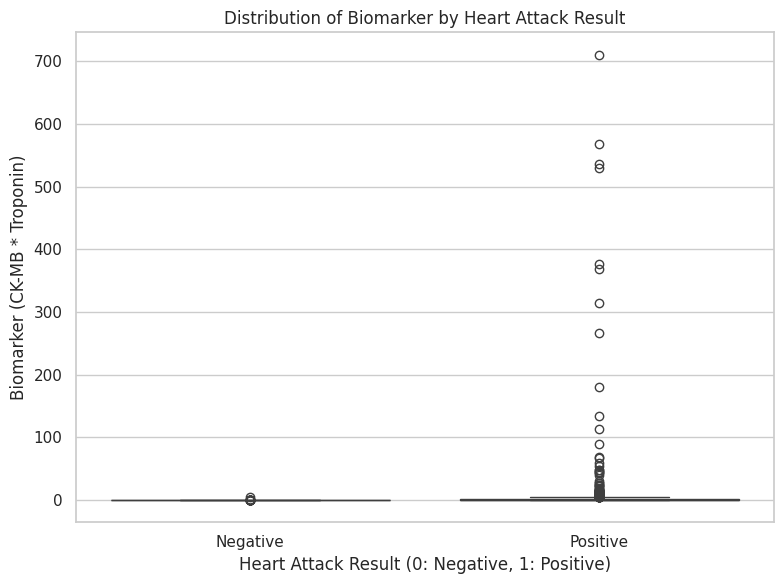

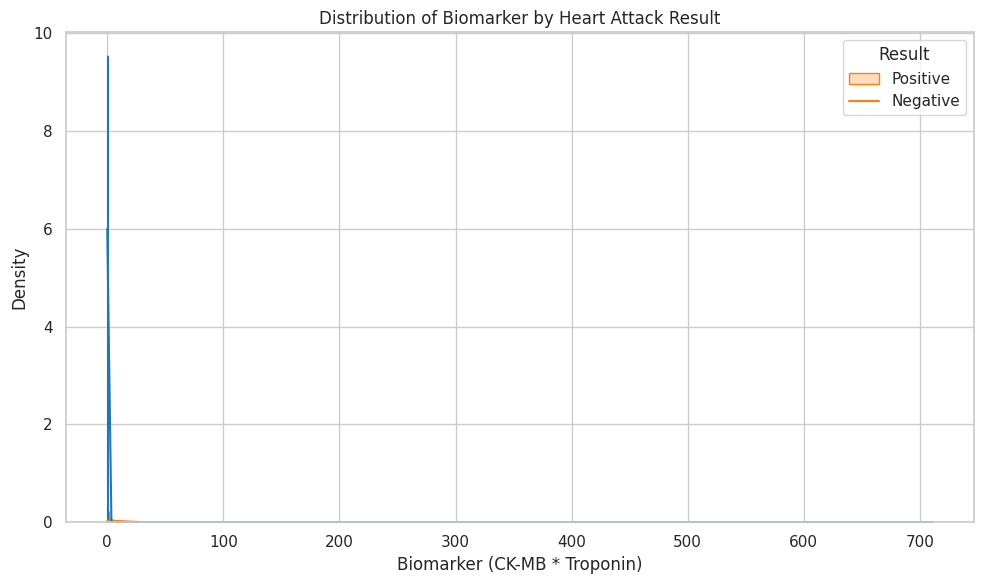


--- Quantifiable Insights from 'Biomarker' Feature ---
          count      mean        std       min       25%       50%       75%  \
Result                                                                         
negative  508.0  0.027003   0.218970  0.000963  0.007493  0.012735  0.021233   
positive  808.0  7.584293  48.669163  0.003252  0.075600  0.303660  1.898155   

             max  
Result            
negative    4.93  
positive  711.00  


In [ ]:
# 4.1. Box Plot of Biomarker vs. Result_Encoded
plt.figure(figsize=(8, 6))
sns.boxplot(x='Result', y='Biomarker', data=df)
plt.title('Distribution of Biomarker by Heart Attack Result')
plt.xlabel('Heart Attack Result (0: Negative, 1: Positive)')
plt.ylabel('Biomarker (CK-MB * Troponin)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.tight_layout()
plt.show()

# 4.2. Histogram/KDE Plot of Biomarker by Result_Encoded
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Biomarker', hue='Result', kde=True, element='step', stat="density", common_norm=False, palette=standard_colors)
plt.title('Distribution of Biomarker by Heart Attack Result')
plt.xlabel('Biomarker (CK-MB * Troponin)')
plt.ylabel('Density')
plt.legend(title='Result', labels=['Positive', 'Negative']) # Adjust legend labels to match hue order
plt.tight_layout()
plt.show()

# --- 5. Quantifiable Insights from Biomarker ---
print("\n--- Quantifiable Insights from 'Biomarker' Feature ---")
biomarker_stats = df.groupby('Result')['Biomarker'].describe()
print(biomarker_stats)


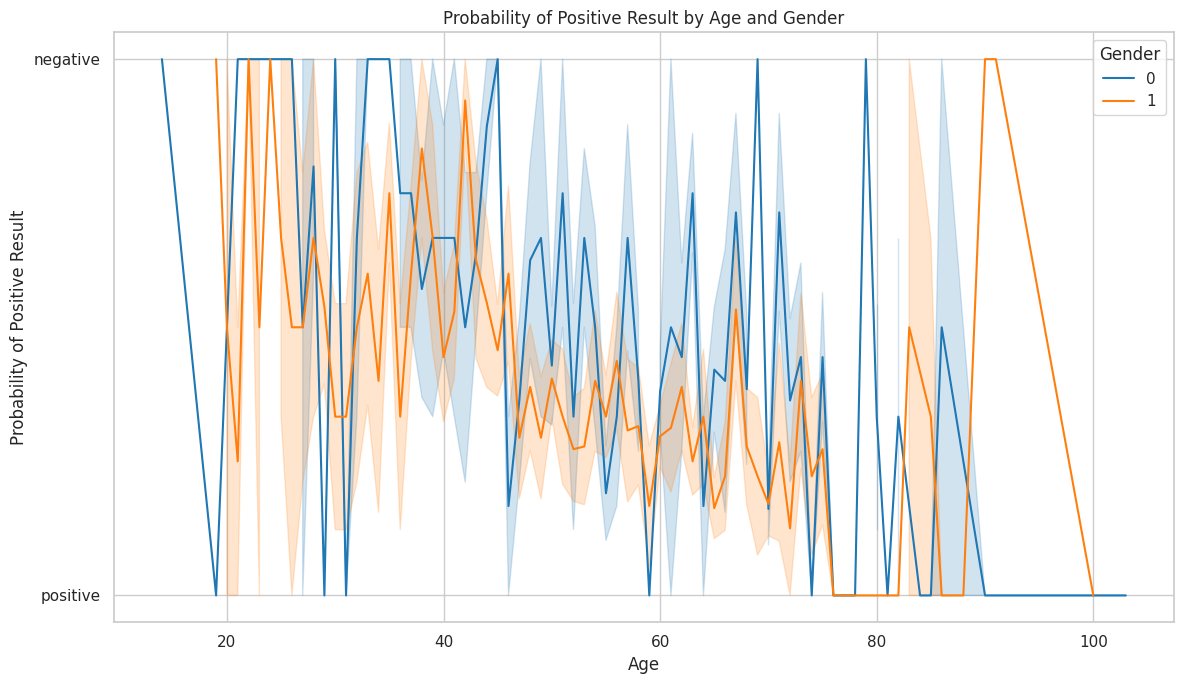

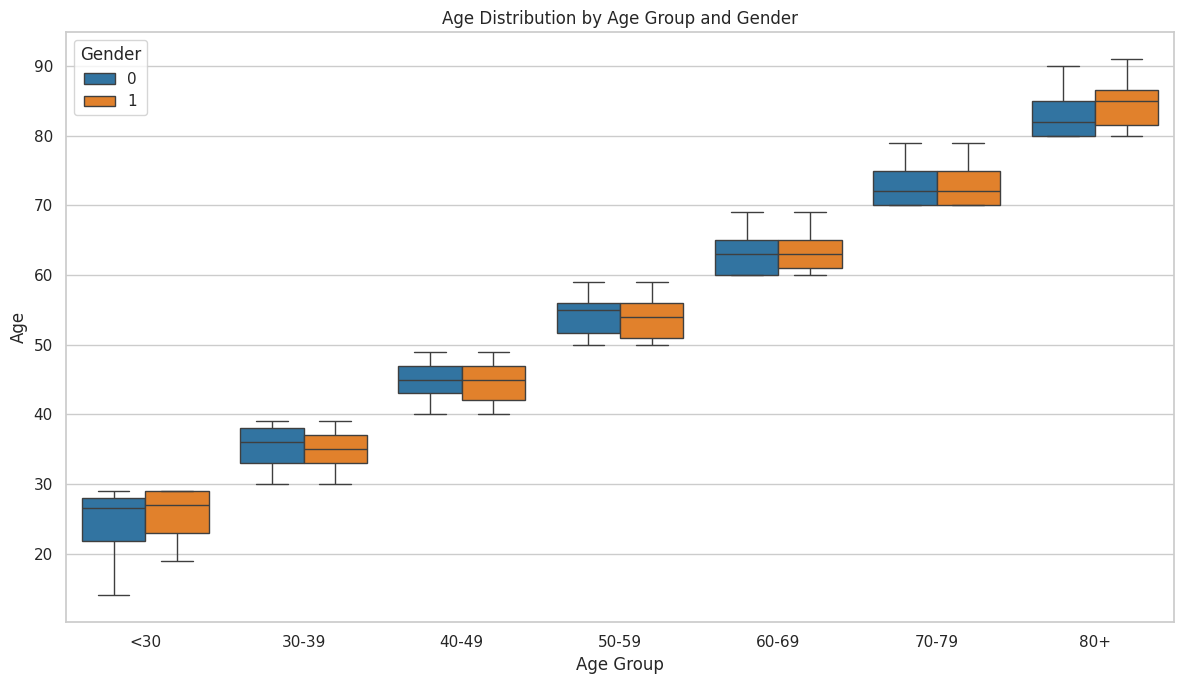


--- Quantifiable Insights from Age-Related Features ---

Descriptive statistics for Age_Squared by Result:
          count         mean          std    min     25%     50%     75%  \
Result                                                                     
negative  508.0  2905.677165  1430.624070  196.0  1764.0  2704.0  3969.0   
positive  808.0  3621.549505  1494.950229  361.0  2500.0  3600.0  4624.0   

              max  
Result             
negative   8281.0  
positive  10609.0  

Descriptive statistics for Age_Gender_Interaction by Result and Gender:
                 count       mean        std   min   25%   50%   75%    max
Result   Gender                                                            
negative 0       201.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0
         1       307.0  50.960912  13.285888  19.0  42.0  50.0  61.0   91.0
positive 0       246.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0
         1       562.0  57.660142  12.641223  20.0  50

In [ ]:

# Create age groups for better visualization of trends
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='Age', y='Result', hue='Gender', errorbar='se', palette=standard_colors)
plt.title('Probability of Positive Result by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Probability of Positive Result')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.2. Box Plot of Age by Result and Gender_Mapped (to show interaction visually)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='AgeGroup', y='Age', hue='Gender', palette=standard_colors)
plt.title('Age Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.tight_layout()
plt.show()



# --- 5. Quantifiable Insights from Age-Related Features ---
print("\n--- Quantifiable Insights from Age-Related Features ---")

print("\nDescriptive statistics for Age_Squared by Result:")
print(df.groupby('Result')['Age_Squared'].describe())

print("\nDescriptive statistics for Age_Gender_Interaction by Result and Gender:")
print(df.groupby(['Result', 'Gender'])['Age_Gender_Interaction'].describe())





**Modelling**

In [ ]:
df['Gender_Mapped'] = df['Gender'].map({0: 'Female', 1: 'Male'})
df['Gender_Encoded'] = df['Gender_Mapped'].map({'Female': 0, 'Male': 1}) # 0 for Female, 1 for Male

df['Result_Encoded'] = df['Result'].map({'negative': 0, 'positive': 1})
print("\nData cleaning and initial encoding steps completed.")

 #3.3. Age_Squared and Age_Gender_Interaction
# Rationale: Capture non-linear age effects and gender-specific age impacts on risk.
df['Age_Squared'] = df['Age']**2
df['Age_Gender_Interaction'] = df['Age'] * df['Gender_Encoded']
print("Engineered 'Age_Squared' and 'Age_Gender_Interaction'.")

print("\n--- Cleaned and Feature-Engineered DataFrame Head ---")
print(df.head())
print("\n--- Check for any remaining NaNs after cleaning and feature engineering ---")
print(df.isnull().sum()) # Ensure no NaNs are introduced by feature engineering

df.head()


Data cleaning and initial encoding steps completed.
Engineered 'Age_Squared' and 'Age_Gender_Interaction'.

--- Cleaned and Feature-Engineered DataFrame Head ---
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  CK_MB_Capped_Flag  \
0        160.0   1.80     0.012  negative                  0   
1        296.0   6.75     1.060  positive                  0   
2        270.0   1.99     0.003  negative                  0   
3        270.0  13.87     0.122  positive                  0   
4        300.0   1.08     0.00

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,CK_MB_Capped_Flag,Troponin_Capped_Flag,AgeGroup,pulse_pressure,MAP,Biomarker,Age_Squared,Age_Gender_Interaction,Gender_Mapped,Gender_Encoded,Result_Encoded
0,64,1,66,160,83,160.0,1.80,0.012,negative,0,0,60-69,77,108.666667,0.02160,4096,64,Male,1,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,0,<30,52,63.333333,7.15500,441,21,Male,1,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0,0,50-59,83,104.666667,0.00597,3025,55,Male,1,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,0,60-69,65,76.666667,1.69214,4096,64,Male,1,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0,0,50-59,47,80.666667,0.00324,3025,55,Male,1,0


In [ ]:
# --- 4. Define Features (X) and Target (y) ---
# Select all relevant features, including the newly engineered ones.
X = df[['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
        'Blood sugar', 'CK-MB', 'Troponin', 'CK_MB_Capped_Flag', 'Troponin_Capped_Flag',
        'Gender_Encoded',
        'pulse_pressure', 'MAP', 'Biomarker', 'Age_Squared', 'Age_Gender_Interaction']]
y = df['Result_Encoded']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")



Features (X) shape: (1316, 15)
Target (y) shape: (1316,)


In [ ]:
# --- 5. Train-Test Split ---
# Stratify by y to ensure similar proportions of 'positive'/'negative' results in both sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training ({len(X_train)} samples) and testing ({len(X_test)} samples).")
print(f"Training 'Result' distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing 'Result' distribution:\n{y_test.value_counts(normalize=True)}")



Data split into training (1052 samples) and testing (264 samples).
Training 'Result' distribution:
Result_Encoded
1    0.614068
0    0.385932
Name: proportion, dtype: float64
Testing 'Result' distribution:
Result_Encoded
1    0.613636
0    0.386364
Name: proportion, dtype: float64


In [ ]:
# --- 6. Feature Scaling ---
# Logistic Regression is sensitive to feature scaling. StandardScaler is used to normalize features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)     # Transform test data using the *same* fitted scaler
print("\nNumerical features scaled using StandardScaler.")


Numerical features scaled using StandardScaler.


In [ ]:
# --- 7. Build and Train the Logistic Regression Model ---
print("\n--- Building and Training Logistic Regression Model ---")
# 'liblinear' solver is good for smaller datasets and supports L1/L2 regularization.
# 'max_iter' increased to ensure convergence.
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")


--- Building and Training Logistic Regression Model ---
Logistic Regression model trained successfully.


In [ ]:
# --- 8. Evaluate the Model ---
print("\n--- Evaluating Logistic Regression Model ---")

y_pred_lr = log_reg_model.predict(X_test_scaled)
y_prob_lr = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_lr))



--- Evaluating Logistic Regression Model ---

Confusion Matrix:
[[ 81  21]
 [ 26 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       102
           1       0.87      0.84      0.85       162

    accuracy                           0.82       264
   macro avg       0.81      0.82      0.81       264
weighted avg       0.82      0.82      0.82       264


ROC AUC Score: 0.8997821350762527


In [ ]:
# --- 9. Interpret the Model (Coefficients) ---
print("\n--- Interpreting Logistic Regression Coefficients ---")
# Coefficients indicate the strength and direction of the relationship between each feature
# and the log-odds of the positive class.
lr_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg_model.coef_[0],
    'Odds Ratio (exp(Coefficient))': np.exp(log_reg_model.coef_[0])
}).sort_values(by='Odds Ratio (exp(Coefficient))', ascending=False)

print(lr_coefficients)

print("\nInterpretation Notes:")
print("- A positive coefficient (Odds Ratio > 1) means that as the feature value increases, the likelihood of a 'positive' heart attack result increases.")
print("- A negative coefficient (Odds Ratio < 1) means that as the feature value increases, the likelihood of a 'positive' heart attack result decreases.")
print("- The magnitude of the Odds Ratio indicates the strength of this relationship. For example, an Odds Ratio of 2.0 means the odds of a positive result are doubled for every one-unit increase in the feature (holding other features constant).")
print("- Remember, these interpretations are for scaled features. For unscaled features, the odds ratio interpretation applies to the original units.")



--- Interpreting Logistic Regression Coefficients ---
                     Feature  Coefficient  Odds Ratio (exp(Coefficient))
5                      CK-MB     5.620364                     275.989958
6                   Troponin     5.027934                     152.617420
0                        Age     0.643099                       1.902368
12                 Biomarker     0.554264                       1.740659
14    Age_Gender_Interaction     0.117014                       1.124135
9             Gender_Encoded     0.077250                       1.080312
3   Diastolic blood pressure     0.023180                       1.023451
1                 Heart rate     0.009577                       1.009623
11                       MAP     0.004418                       1.004427
2    Systolic blood pressure    -0.016851                       0.983290
10            pulse_pressure    -0.035854                       0.964781
4                Blood sugar    -0.090414                       0.913

In [ ]:
# --- 10. Hyperparameter Tuning (Optional but Recommended) ---
# Justification: Tuning hyperparameters optimizes model performance and prevents overfitting.
# GridSearchCV systematically searches for the best combination of parameters.
print("\n--- Hyperparameter Tuning: Logistic Regression (Example) ---")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100], # Inverse of regularization strength (smaller C means stronger regularization)
    'solver': ['liblinear', 'saga'] # Solvers supporting L1/L2 regularization
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best ROC AUC score (Cross-Validation): {grid_search_lr.best_score_:.4f}")

# Evaluate tuned Logistic Regression model on test set
y_pred_lr_tuned = grid_search_lr.best_estimator_.predict(X_test_scaled)
y_prob_lr_tuned = grid_search_lr.best_estimator_.predict_proba(X_test_scaled)[:, 1]

print("\nTuned Logistic Regression Evaluation on Test Set:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr_tuned))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr_tuned))


--- Hyperparameter Tuning: Logistic Regression (Example) ---
Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best ROC AUC score (Cross-Validation): 0.9596

Tuned Logistic Regression Evaluation on Test Set:
Confusion Matrix:
 [[ 96   6]
 [ 13 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       102
           1       0.96      0.92      0.94       162

    accuracy                           0.93       264
   macro avg       0.92      0.93      0.93       264
weighted avg       0.93      0.93      0.93       264

ROC AUC Score: 0.9762769305252965


**Key insights**



1.   There are 1319 patient. **61.4%** Has good good chances of heart attack and **38.6 ** has less chances of heart attack.
2.   Out of postive cases **69.55% **are male patient and **30.45%** are female patient
3.**CK-MB and Troponi**n clearly distinguish between positive and negative cases For both CK-MB and Troponin, positive cases dominate the higher value range
4.Any patient with** CKMB>23.5** and **Tropnin > 0.57** should be alterted in advance from hospital agency
5.From age **60 to 69** there is spike in the positive cases , Special Knowledge transfer should be given for this age range.





**Recommendation**



1.   Male Patient with the Age group between 60 to 69 are high risk to hear attack. Automatic alert can be sent to alert them and educational knowledge needd to provide to them to avoid such risks
2.   Any patient with CKMB >23.5 and Tropnin>0.57 are in red alert and need to inform and suggested the medication to maintain this.



**Data Dictionary**

Age = Age of the patient
Gender = Gender of the patient e.g 0 = Female and 1= male
Heart rate = Heart rate of each patient measured in
Systolic blood pressure	=
Diastolic blood pressure
Blood sugar	= Blood Suger level to measure in the patient body
CK-MB	= Enzymes Found in the Patient body to predict possible chance of heart attack, Higher the value the higher chances of heart attack
Troponin	= Enzymes Found in the Patient body to predict possible chance of heart attack, Higher the value the higher chances of heart attack
Result = Positive = the patient has heart attack negetive = Patient dont have heart attack.